In [1]:
import torch
from utils.mnist_reader import load_mnist
from Dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
print(torch.__version__)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())
print(torch.version.cuda)

2.0.0+cu118
True
False
11.8


### Data preprocessing

In [3]:
data = load_mnist("data/fashion/")
x = data[0]/255.0
y = data[1]

In [4]:
data[0].shape

(60000, 784)

In [5]:
#Getting one (first) representative from each class
classes, index_sample = np.unique(y,return_index=True)
class_sample = x[index_sample]

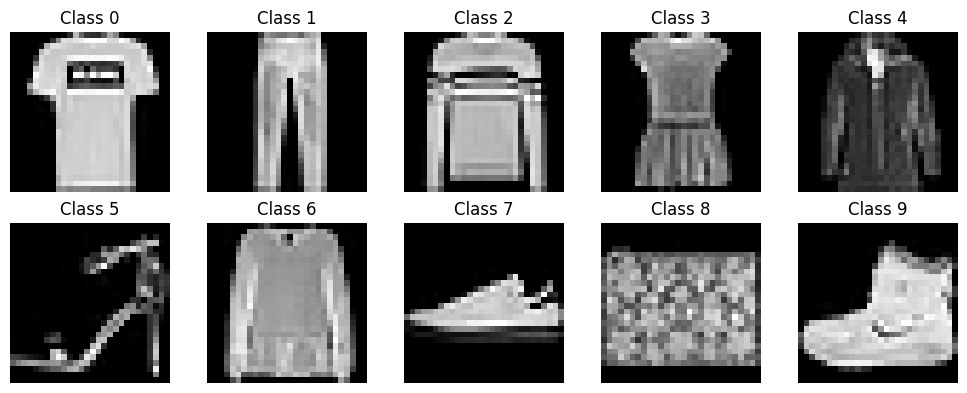

In [6]:
#Displaying the class representatives
NROWS = 2
NCOLS = 5
reshaped = class_sample.reshape(-1,28,28)

plt.figure(figsize=(10,4))
for i in range(NROWS * NCOLS):
    plt.subplot(NROWS, NCOLS, i+1)
    plt.imshow(reshaped[i],cmap='gray')
    plt.title(f"Class {classes[i]}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [7]:
#Shaping the data to the 1 channel, 2d greyscale image
x_train, x_val, y_train, y_val = train_test_split(
    x.reshape(-1,1,28,28), y, test_size=0.2
)
#One-hot encoding
encd = OneHotEncoder(sparse=False)
y_train = encd.fit_transform(y_train.reshape(-1,1))
y_val = encd.transform(y_val.reshape(-1,1))
#PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [30]:
#Use dataset (from Dataset.py file) to create two dataset
BSIZE = 16
TRAIN = Dataset(x_train,y_train, batch_size=BSIZE)
VALID = Dataset(x_val,y_val, batch_size=BSIZE)

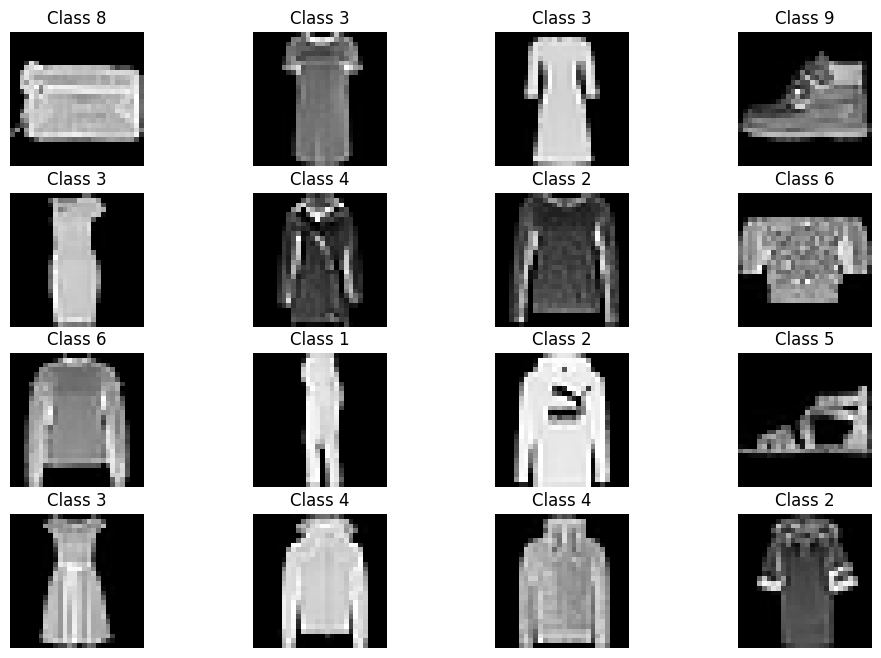

In [46]:
#Yet another visualisation
plt.figure(figsize=(12, 8))

# Choose one random batch
inputs, labels = TRAIN.__getitem__(112)

# Decode one-hot encoded labels
decoded_labels = np.argmax(labels, axis=1)

# Iterate over individual samples in the batch
for i in range(BSIZE):
    plt.subplot(4, 4, i + 1)
    plt.imshow(inputs[i, 0], cmap='gray')
    plt.title(f"Class {decoded_labels[i]}")
    plt.axis('off')

plt.show()

### Implementation of ReLU, Maxpool 2D, and 2D Convolution

In [74]:
bx,by = TRAIN[1772]

In [76]:
f = torch.nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=0)

In [81]:
bx.shape

torch.Size([16, 1, 28, 28])

In [80]:
f(bx).shape

torch.Size([16, 16, 26, 26])